# ML Regression

## Ingest

Source:  http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/functional_intro_to_python/master/data/mlb_weight_ht.csv")
df.head()


,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


Find N/A

In [0]:
df.shape

(1034, 6)

In [0]:
df.isnull().values.any()

True

In [0]:
df = df.dropna()
df.isnull().values.any()

False

In [0]:
df.shape

(1033, 6)

### Clean

In [0]:
df.rename(index=str, 
             columns={"Height(inches)": "Height", "Weight(pounds)": "Weight"},
             inplace=True)
df.head()


,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [0]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1033 entries, 0 to 1033
Data columns (total 6 columns):
Name        1033 non-null object
Team        1033 non-null object
Position    1033 non-null object
Height      1033 non-null int64
Weight      1033 non-null float64
Age         1033 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 56.5+ KB


In [0]:
#Drop Name
df.drop(['Name'],axis=1)


,Team,Position,Height,Weight,Age
0,BAL,Catcher,74,180.0,22.99
1,BAL,Catcher,74,215.0,34.69
2,BAL,Catcher,72,210.0,30.78
3,BAL,First_Baseman,72,210.0,35.43
4,BAL,First_Baseman,73,188.0,35.71
5,BAL,Second_Baseman,69,176.0,29.39
6,BAL,Shortstop,69,209.0,30.77
7,BAL,Third_Baseman,71,200.0,35.07
8,BAL,Third_Baseman,76,231.0,30.19
9,BAL,Outfielder,71,180.0,27.05


In [0]:
#Create dummy variable for team
Team_dummy = pd.get_dummies(df['Team'])

In [0]:
# Replace Position with number
df.Position.unique()
numbers = {'Position': {'Catcher': 0, 'First_Baseman': 1, 'Second_Baseman': 2, 'Third_Baseman': 3, 'Shortstop': 4, 'Outfielder': 5, 
                        'Designated_Hitter': 6, 'Starting_Pitcher': 7, 'Relief_Pitcher': 8}}
df.replace(numbers, inplace = True)

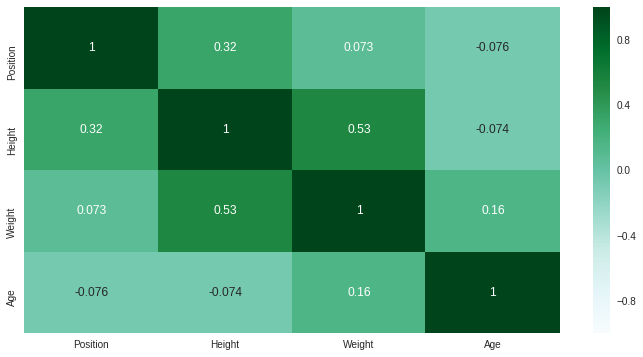

In [0]:
#Plot a heat map of ( Age, Weight, Height, Position)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True, cmap = "BuGn")
# It can be viewed in the map that Weight and Height are highly related, and Height is highly related to Position, which makes sense that taller people will be forward position most of the times

## Model

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Create Features


In [0]:
var = df['Height'].values
var.shape

(1033,)

In [0]:
y = df['Height'].values #Target
#y = y.reshape(-1, 1)
X = df[['Position','Weight']].values #Feature(s)
#X = X.reshape(-1,1)

y.shape

(1033,)

### Split data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(826, 2) (826,)
(207, 2) (207,)


### Fit the model

In [0]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Returns Numpy Array

In [0]:
type(predictions)

numpy.ndarray

### Plot Predictions

Text(0, 0.5, 'Predicted Height')

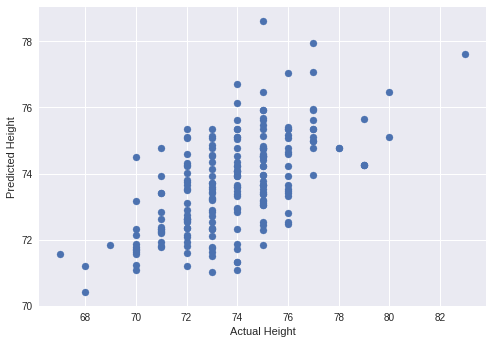

In [0]:
from matplotlib import pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")

### Print Accuracy of Linear Regression Model

In [0]:
model.score(X_test, y_test)

0.363182970708125

### Use Cross-Validation

In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [0]:
scores = cross_val_score(model, X, y, cv=6)
scores

array([0.40672679, 0.33286148, 0.32134336, 0.35590968, 0.25891771,
       0.41003812])

### Plot Cross-validation Predictions 

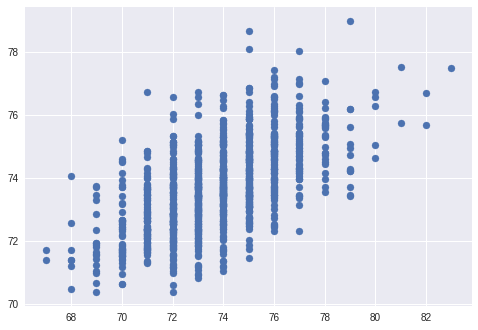

In [0]:
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)

In [0]:
accuracy = metrics.r2_score(y, predictions)
accuracy

0.280770222008195

### Visualize cross-validated scores for Linear regression model

See this:  http://www.scikit-yb.org/en/latest/api/model_selection/cross_validation.html

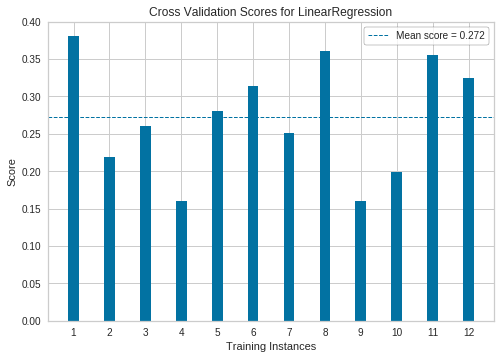

In [0]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from yellowbrick.model_selection import CVScores

# Create a new figure and axes
_, ax = plt.subplots()
cv = KFold(12)

oz = CVScores(
    linear_model.LinearRegression(), ax=ax, cv=cv, scoring='r2'
)

oz.fit(X, y)
oz.poof()

## Conclusion

* Cross-Validation improved Accuracy
* Adding more data or more features could improve the model
* Major League Baseball may be a strange set to predict Weight
* Bigger Data Set here:  http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html


##**text**

哈哈哈哈